In [ ]:
import pandas as pd
df = pd.read_csv('/content/LlegadaTurismoMexicov1.csv', sep=',', encoding='utf-8')

# Verifica las primeras filas para entender la estructura de los datos
print("Datos originales:")
print(df.head())


Datos originales:
  Compendio    Pais        Estado   Año       Mes  \
0     Cap_6  México  Quintana Roo  2022  [12] Dic   
1     Cap_6  México  Quintana Roo  2022  [11] Nov   
2     Cap_6  México  Quintana Roo  2022  [10] Oct   
3     Cap_6  México  Quintana Roo  2022  [09] Sep   
4     Cap_6  México  Quintana Roo  2022  [08] Ago   

   Cuartos Disponibles Promedio  Cuartos Disponibles  \
0                   121924.9473          3779673.367   
1                   121713.6848          3651410.544   
2                   121749.7869          3774243.392   
3                   120949.0237          3628470.711   
4                   121584.2909          3769113.018   

   Cuartos Ocupados Nacionales  Cuartos Ocupados Extranjeros  \
0                  464397.0582                   2482108.394   
1                  460205.6859                   2343910.105   
2                  476900.5699                   2144049.873   
3                  446698.7105                   1879951.060   
4     

In [ ]:
# Reemplazar valores faltantes con ceros
df.fillna(0, inplace=True)

# Mostrar información del DataFrame para verificar si hay valores faltantes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Compendio                         1788 non-null   object 
 1   Pais                              1788 non-null   object 
 2   Estado                            1788 non-null   object 
 3   Año                               1788 non-null   int64  
 4   Mes                               1788 non-null   object 
 5   Cuartos Disponibles Promedio      1788 non-null   float64
 6   Cuartos Disponibles               1788 non-null   float64
 7   Cuartos Ocupados Nacionales       1788 non-null   float64
 8   Cuartos Ocupados Extranjeros      1788 non-null   float64
 9   Cuartos Ocupados  SIN Clasificar  1788 non-null   float64
 10  Llegada de Turistas Nacionales    1788 non-null   float64
 11  Llegada de Turistas Extranjeros   1788 non-null   float64
 12  Turist

In [ ]:
# Mostrar el tipo de dato de la columna 'Mes'
print(df['Mes'].dtype)


object


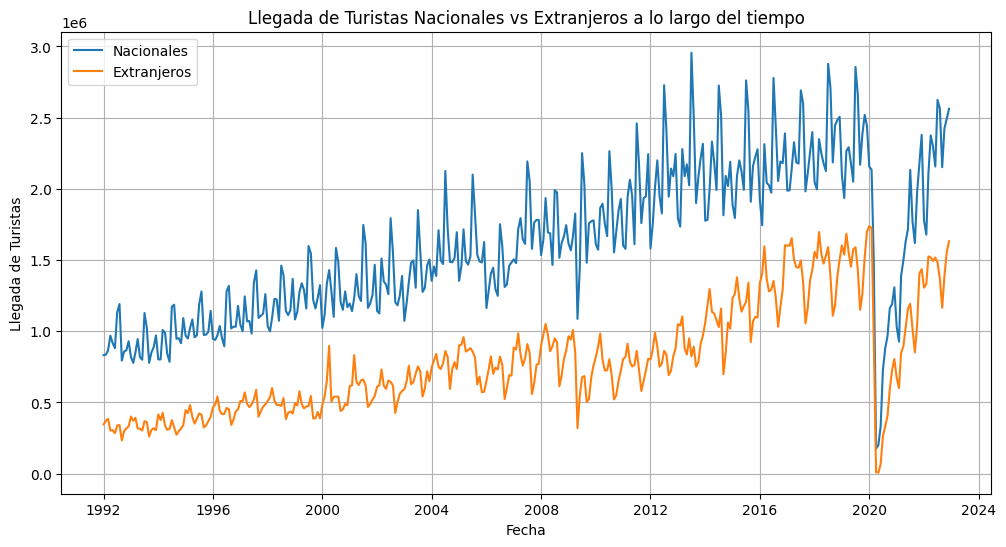

In [ ]:
# Corregir la expresión regular y convertir la columna 'Mes' a formato de fecha
df['Fecha'] = df['Año'].astype(str) + '-' + df['Mes'].str.extract('\[(\d+)\]', expand=False).astype(str).str.zfill(2)
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Agrupar los datos por año y mes y calcular la llegada total de turistas
df_year_month = df.groupby(['Fecha'])[['Llegada de Turistas Nacionales', 'Llegada de Turistas Extranjeros']].sum()

# Graficar la llegada de turistas a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_year_month.index, df_year_month['Llegada de Turistas Nacionales'], label='Nacionales')
plt.plot(df_year_month.index, df_year_month['Llegada de Turistas Extranjeros'], label='Extranjeros')
plt.xlabel('Fecha')
plt.ylabel('Llegada de Turistas')
plt.title('Llegada de Turistas Nacionales vs Extranjeros a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


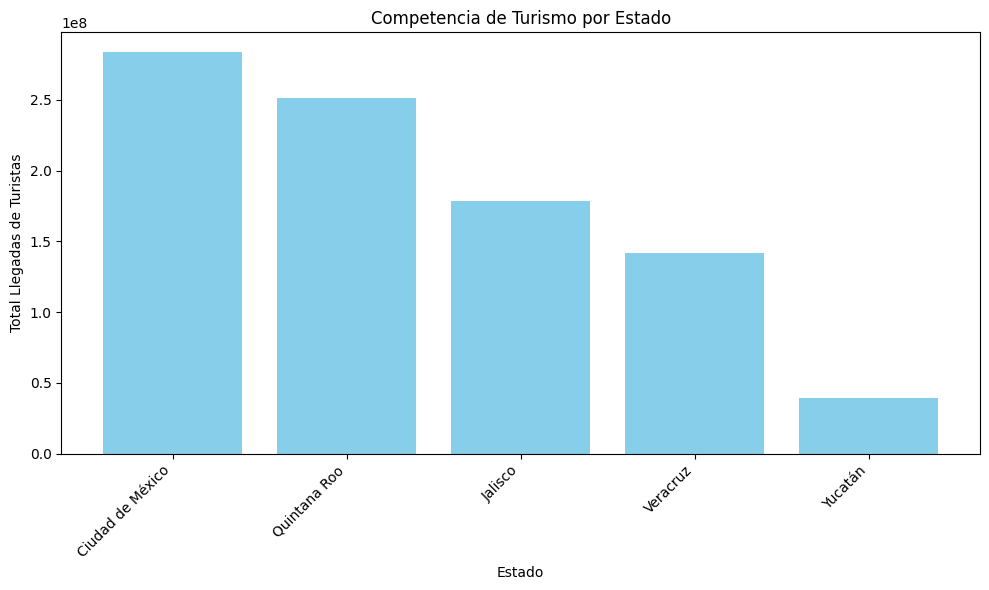

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por estado y sumar las llegadas de turistas
competencia_por_estado = df.groupby('Estado')[['Llegada de Turistas Nacionales', 'Llegada de Turistas Extranjeros']].sum().reset_index()

# Calcular el total de llegadas de turistas sumando las llegadas nacionales y extranjeras
competencia_por_estado['Total Llegadas'] = competencia_por_estado['Llegada de Turistas Nacionales'] + competencia_por_estado['Llegada de Turistas Extranjeros']

# Ordenar los datos por la cantidad total de llegadas de turistas
competencia_por_estado = competencia_por_estado.sort_values(by='Total Llegadas', ascending=False)

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.bar(competencia_por_estado['Estado'], competencia_por_estado['Total Llegadas'], color='skyblue')
plt.title('Competencia de Turismo por Estado')
plt.xlabel('Estado')
plt.ylabel('Total Llegadas de Turistas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
